# Klassifizierung mit k-Nearest-Neighbor
Liegt ein Datensatz vor, in dem neben einem oder mehreren kontinuierlichen Eigenschaften (Features) für jedes Beispiel eine Klassenbezeichnung bekannt ist, kann der [k-Nearest-Neighbor Algorithmus](https://de.wikipedia.org/wiki/N%C3%A4chste-Nachbarn-Klassifikation) (kNN) genutzt werden, um neue Beispiele zu klassifizieren.

Dabei wird anhand der Eigensschaften ein ein- oder mehrdimensionaler Vektorraum aufgebaut, und die Beispiele des Datensatzes als Datenpunkte in diesem Raum dargestellt. Kommt ein neuer Datenpunkt hinzu, für den die Klasse bisher unbekannt ist, wird die Klasse der `k` nächsten Nachbarn dieses Datenpunkts betrachtet und für den neuen Punkt übernommen. Es werden die Abstände eines neuen Datenpunktes zu den `k` nähesten Datenpunkten gemessen, um herauszufinden, zu welcher Klasse dieser gehört.

![k-Nearest-Neighbor](https://adataanalyst.com/wp-content/uploads/2016/07/kNN-1.png)

Der hier genutzte Datensatz wurde bereits [1936 an der UCI Berkeley](https://archive.ics.uci.edu/ml/datasets/Iris) entwickelt und ist wohlmöglich der bekannteste Datensatz im Bereich der Mustererkennung: In diesem Beispiel geht es um die Klassifizierung dreier Arten von Schwertlilien (_lat. Iris_). Wie in der Abbildung unten zu erkennen sind diese drei Arten sehr ähnlich. In dem Datensatz befinden sich neben der Information über die Art die Maße der Kelchblätter (Sepale) und Kronblätter (Petale). In diesem Notebook wird überprüft, ob der kNN-Algorithmus genutzt werden kann, um die drei Schwertlilien-Arten anhand ihrer Blütenmaße zu klassifizieren.

![Schwertlilie](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Programmbibliotheken importieren
Auch hier werden alle notwendigen Module importiert.

In [1]:
import numpy as np
import helper
from sklearn import neighbors, datasets

## Datensatz laden
Der Iris-Datensatz wird geladen und die ersten beiden Features (sepal length in cm, sepal width in cm) werden ausgewählt.

In [2]:
# Datensatz von sklearn.datasets laden
iris = datasets.load_iris()

# Die ersten beiden Features auswählen und auf X schreiben
X = iris.data[:, 0:2]

# Klasseinformation auf eine Variable Y schreiben
Y = iris.target

## Modell erstellen
sklearn bringt ein vorgefertigtes Modell zur kNN-Klassifikation mit. Dieses kann mit einem einfachen Funktionsaufruf erzeugt und auf eine Variable `knn` geschrieben werden.

In [3]:
# Anzahl der nächsten Nachbarn festlegen
k = 5

# Klassifizierungsmodell initialisieren
knn = neighbors.KNeighborsClassifier(n_neighbors=k)

## Modell mit Daten versorgen
k-Nearest-Neighbor ist ein nichtparametrisches Modell, welches nicht explizit "trainiert" werden muss. Vielmehr wird das Modell mit dem folgenden Funktionsaufruf `knn.fit(...)` einmalig mit den Trainingsdaten versorgt, damit diese darin gespeichert werden können. kNN ist ein _lazy learning_ Algorithmus, was bedeutet, dass alle Berechnungen erst zum Zeitpunkt der Abfrage eines neuen Datenpunkts (dem Funktionsaufruf `knn.predict(...)`) ausgeführt werden.

In [4]:
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Klassifizierung durchführen
Angenommen, die Blüte einer Schwertlilie wird gefunden und ein Laie ist sich nicht sicher, um welche Art es sich handelt. Er vermisst die Blüte und stellt fest, dass die Kelchblätter 4.9 cm lang und 2.1 cm breit sind. Das kNN Modell mit dem Iris-Datensatz kann nun genutzt werden, um herauszufinden, zu welcher der drei Arten die Blüte wahrscheinlich gehört. Dazu wird die `knn.predict`-Funktion mit den Messwerten aufgerufen.

In [5]:
knn.predict([[4.9, 2.1]])

array([1])

Die durch das Modell vorhergesagte Klasse mit dem Index 1 ist "Iris Setosa". Es gibt außerdem die Möglichkeit, das Ergebnis mit der Funktion `predict_proba` in Form von Wahrscheinlichkeiten für die drei Klassen auszugeben.

In [6]:
knn.predict_proba([[4.9, 2.1]])

array([[0. , 0.8, 0.2]])

Hier wird deutlich, dass die Klasse mit dem Index 1 ausgewählt wurde, da sie die größte Wahrscheinlichkeit hat. Das Modell gibt eine geringe Wahrscheinlichkeit von 0.2 an, dass es sich bei der Pflanze doch um eine Iris Virginica handelt.

## Ergebnisse visualisieren
Um eine genauere Vorstellung über den Ergebnisraum eines kNN-Modells zu erhalten hilft es, eine Visualisierung zu erstellen. Hierfür wird der zweidimensionale Raum (Sepal length, Sepal width) in regelmäßigen Abständen geprüft und den Klassen entsprechend eingefärbt. Die Punkte des Trainingsdatensatzes werden eingezeichnet.

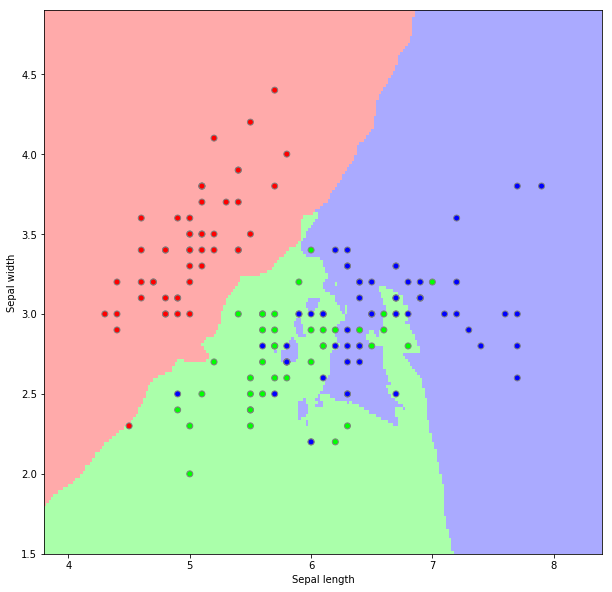

In [7]:
helper.plot_decision_boundary(X, Y, knn)

### Experiment: Parameter `k` ändern
In der dritten ausführbaren Zelle befindet sich die Definition des Parameters `k = 5`. Wie verhält sich die Grenze zwischen den Klassen, wenn `k` erhöht oder verringert wird?


## Weiterführende Fragen

* Kann der k-Nearest-Neighbor Algorithmus auch für Regressionsprobleme genutzt werden? Wenn ja, wie könnte für einen neuen Datenpunkt ein kontinuierlicher Wert ermittelt werden?
* Wofür könnte das k-nearest-neighbor Verfahren sinnvoll genutzt bzw. erweitert werden, wenn die Labels für die Klassifizierung nicht vorliegen? _Stichwort: Unsupervised Learning_
* Varianten des k-Nearest-Neighbor Algorithmus werden für _Recommendations_, also z.B. für Empfehlungen bei dem Musikdienst Spotify oder dem Streamingdienst Netflix verwendet. Wie könnte so ein Algorithmus grundsätzlich arbeiten bzw. welche Daten sind hierfür relevant?

## Weiterführende Links
* Das _Vision Lab_ der Stanford University stellt eine Browserbasierte, [interaktive Demo zum k-Nearest-Neighbor Algotithmus](http://vision.stanford.edu/teaching/cs231n-demos/knn/) zur Verfügung. Datenpunkte können verschoben werden und alle anderen wichtigen Parameter können zur Veranschaulichung verändert werden.
* [Machine Learning Playground](http://ml-playground.com) erlaubt das Experimentieren mit verschiedenen ML-Algorithmen zum Lösen eines Klassifizierungsproblems. Ähnlich wie in diesem Notebook werden die Klassen im Input-Raum als _Decision Boundary_ visualisiert. Hier ist sehr gut zu sehen, wo die Grenzen der unterschiedlichen Algorithmen sind.